<a href="https://colab.research.google.com/github/2350611h/azure-openai-test/blob/main/B3_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. データの読み込み

### 1-1. データのアップロード
データのサイズが小さい場合は files.upload() が利用できます。
データのサイズが大きい場合はファイル領域にドラッグ＆ドロップでアップロードします。

In [101]:
from google.colab import files
uploaded = files.upload()

Saving 2023_japan_baseball_2.csv to 2023_japan_baseball_2 (2).csv


### 1-2. データの読み込み

In [102]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

下のindex_col と header にはそれぞれ1列目（index_col）と1行目（header）にラベルが入っているかどうかを指定します。ラベルが入っている場合はラベルの入っている列・行の番号（1行目1列目が0，以下2行目2列目が1...）を，ラベルが入っていない場合は「None」を指定します。

In [103]:
data = pd.read_csv("2023_japan_baseball_2.csv", index_col=None, header=0)

In [104]:
data.head()

,Unnamed: 0,順位,打率,出塁率,長打率,打数,得点,打点,安打,一塁打,...,完投,完封,投球回,失点,自責点,被安打,被本塁打,奪三振,与四球,与死球
0,阪神,1,0.247,0.322,0.352,4775,555,534,1180,883,...,10,6,1286.6,-424,-381,-1105,-88,1009,-315,-42
1,広島,2,0.246,0.304,0.357,4728,493,476,1165,854,...,9,7,1272.9,-508,-454,-1187,-109,975,-400,-43
2,DeNA,3,0.247,0.305,0.369,4783,520,503,1182,829,...,10,3,1285.6,-496,-452,-1206,-118,1158,-359,-43
3,巨人,4,0.252,0.308,0.402,4826,523,511,1218,836,...,8,3,1275.4,-507,-482,-1117,-129,1075,-401,-64
4,ヤクルト,5,0.239,0.310,0.367,4712,534,509,1128,782,...,3,3,1264.4,-567,-516,-1215,-143,953,-382,-63


### 1-3. 文字列データの数値データへの変換
文字列データは今回利用する決定木では使えませんので，これを数値に変換します。

In [59]:
data['weather_val']   = data['weather'].map({'sunny':0, 'cloudy':1, 'rainy':2})
data['wind_val']      = data['wind'].map({'strong':1, 'weak':0})
data['play_golf_val'] = data['play_golf'].map({'yes':1, 'no':0})

KeyError: 'weather'

In [61]:
data.head()

,Unnamed: 0,順位,打率,出塁率,長打率,打数,得点,打点,安打,一塁打,...,完投,完封,投球回,失点,自責点,被安打,被本塁打,奪三振,与四球,与死球
0,阪神,1,0.247,0.322,0.352,4775,555,534,1180,883,...,10,6,1286.6,-424,-381,-1105,-88,1009,-315,-42
1,広島,2,0.246,0.304,0.357,4728,493,476,1165,854,...,9,7,1272.9,-508,-454,-1187,-109,975,-400,-43
2,DeNA,3,0.247,0.305,0.369,4783,520,503,1182,829,...,10,3,1285.6,-496,-452,-1206,-118,1158,-359,-43
3,巨人,4,0.252,0.308,0.402,4826,523,511,1218,836,...,8,3,1275.4,-507,-482,-1117,-129,1075,-401,-64
4,ヤクルト,5,0.239,0.310,0.367,4712,534,509,1128,782,...,3,3,1264.4,-567,-516,-1215,-143,953,-382,-63


### 1-4. 学習用データの作成
読み込んだデータから，学習用データを作成します。学習用データは入力（独立変数）と教師（正しい出力。目的変数の値）からなります。

データの作成方法としては a) 使うデータを指定する方法と b) 使わないデータを指定する方法の2種類があります。どちらも最終的には同じ結果になりますが。使うデータが少ない場合は a) が，使うデータが多い場合は b) が良いと思います。

a) 使うデータを指定する方法

In [105]:
features = ['打率', '犠飛', '盗塁', '奪三振'] # 使うデータのラベル
X = data[features]
Y = data['順位']

b) 使わないデータを指定する方法

In [ ]:
unused = ["weather", "wind", "play_golf", "play_golf_val"] # 使わないデータのラベル
X = data.drop(unused, axis=1)
Y = data["play_golf_val"]
features = X.keys().tolist()

## 2. 決定木の学習

### 2-1. 決定木オブジェクトの作成

In [106]:
clf = DecisionTreeClassifier()

### 2-2. 決定木の学習
独立変数Xに対する目的変数Yを用いて決定木を学習します。

In [107]:
clf.fit(X,Y)

DecisionTreeClassifier()

## 3. 可視化

### 3-1. 日本語フォントのインストール

In [108]:
!apt install fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


### 3-2. GraphVizを用いた可視化

In [118]:
from sklearn import tree
import pydotplus.graphviz as gv
from IPython.display import Image

In [123]:
tree.export_graphviz(clf, out_file="2023_japan_baseball_2.dot",
                     feature_names = features,
                     class_names=["A", "B", "C", "D", "E", "F"])

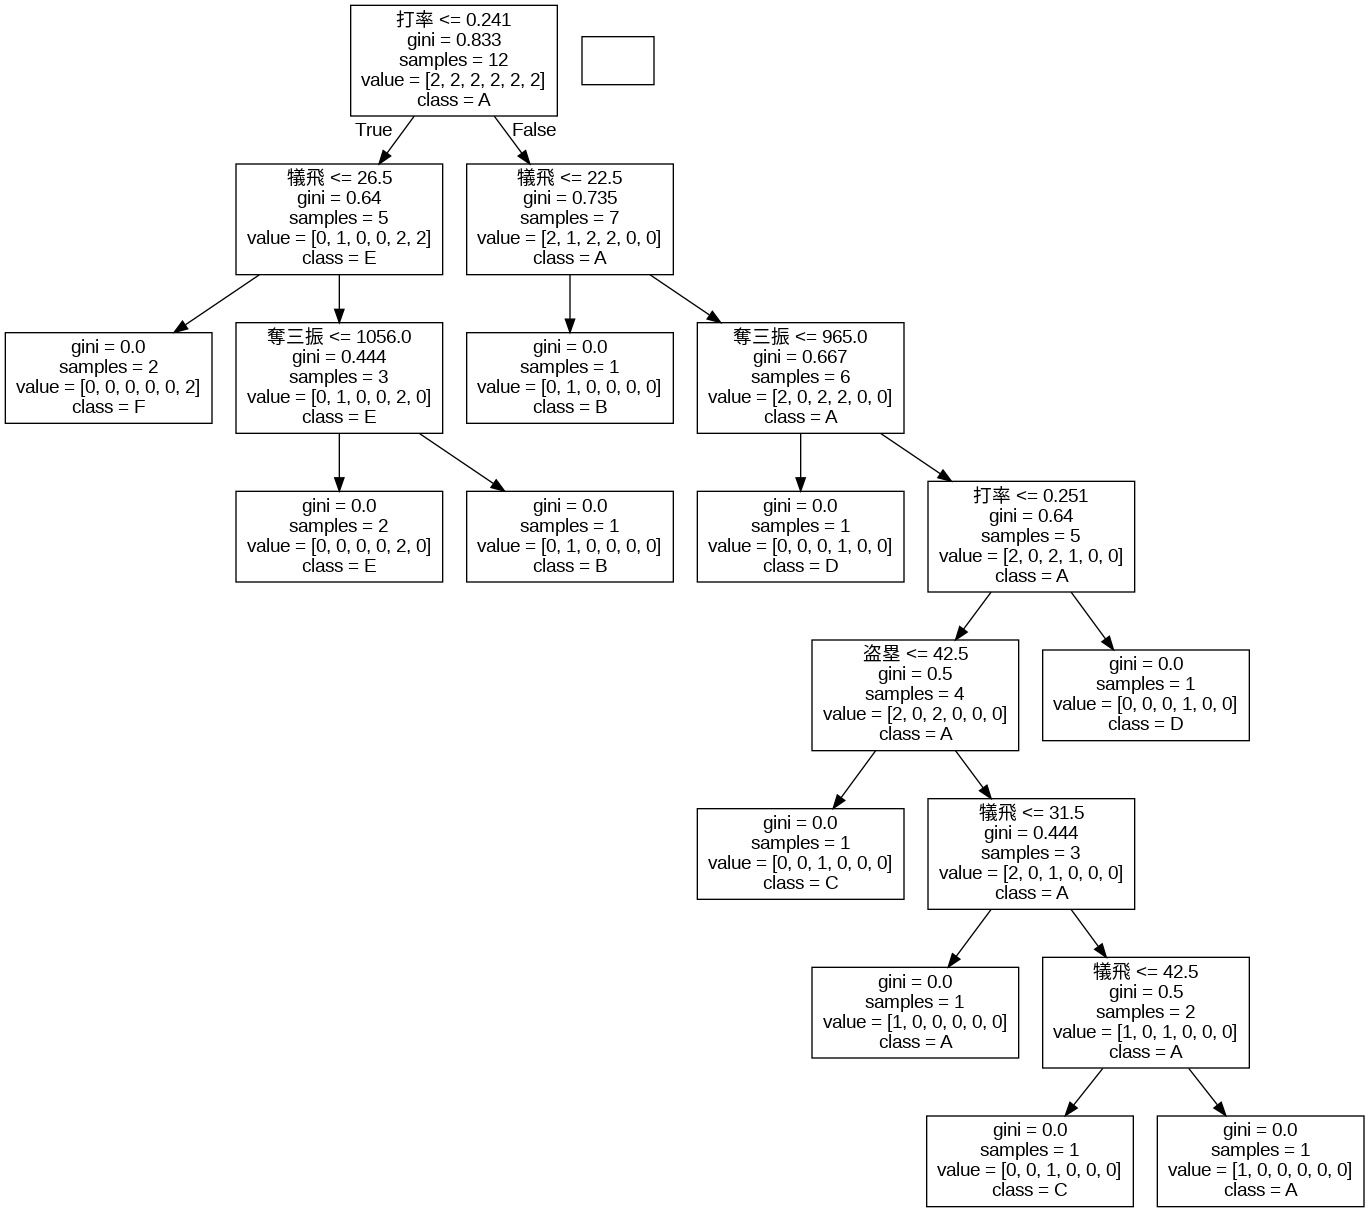

In [124]:
graph = gv.graph_from_dot_file("2023_japan_baseball_2.dot")
Image(graph.create_png())

In [99]:
clf.predict(X)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [100]:
clf.predict([[1,19,40,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])